In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load Dataset

In [2]:
count = pd.read_csv('./data/online_videos/video_count.csv', parse_dates=['date'])
count.head()

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08


In [3]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41775 entries, 0 to 41774
Data columns (total 3 columns):
video_id    41775 non-null int64
count       41775 non-null int64
date        41775 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 979.2 KB


In [4]:
feature = pd.read_csv('./data/online_videos/video_features.csv', 
                      parse_dates=['video_upload_date'])
feature.head()

,video_id,video_length,video_language,video_upload_date,video_quality
0,2374,1760,Cn,2014-12-06,480p
1,1897,489,Cn,2014-12-10,720p
2,2386,1273,Es,2014-12-05,480p
3,2912,986,Es,2014-12-10,240p
4,2432,1050,Other,2014-12-10,480p


In [5]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 5 columns):
video_id             2785 non-null int64
video_length         2785 non-null int64
video_language       2785 non-null object
video_upload_date    2785 non-null datetime64[ns]
video_quality        2785 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 108.9+ KB


In [6]:
# merge data
data = pd.merge(left=count, right=feature, on='video_id', how='left')
data = data.rename(columns={'video_length': 'length', 
                            'video_language': 'language', 
                            'video_upload_date': 'upload_date', 
                            'video_quality': 'quality'})
data.head()

,video_id,count,date,length,language,upload_date,quality
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p
3,1472,234,2015-01-04,157,Other,2014-12-10,240p
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p


# Data Processing and Analysis

In [7]:
# extract time interval information
data['interval'] = (data['date'] - data['upload_date']).apply(lambda x: x.days)

# extract video play day of week
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)

data.head()

,video_id,count,date,length,language,upload_date,quality,interval,dayofweek
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p,28,2
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p,36,0
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p,22,5
3,1472,234,2015-01-04,157,Other,2014-12-10,240p,25,6
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p,20,3


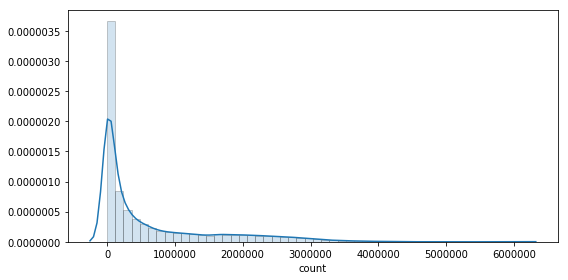

In [8]:
# visualization of count
warnings.filterwarnings('ignore')
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(figsize=(8, 4))
sns.distplot(data['count'], ax=ax, hist_kws=hist_kws)
plt.tight_layout()
plt.show()

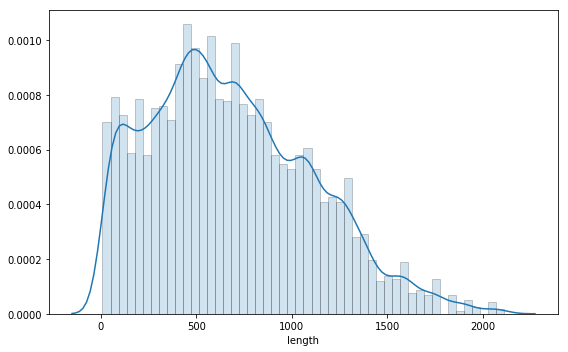

In [9]:
# visualization of length
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(data['length'], ax=ax, hist_kws=hist_kws)
plt.tight_layout()
plt.show()

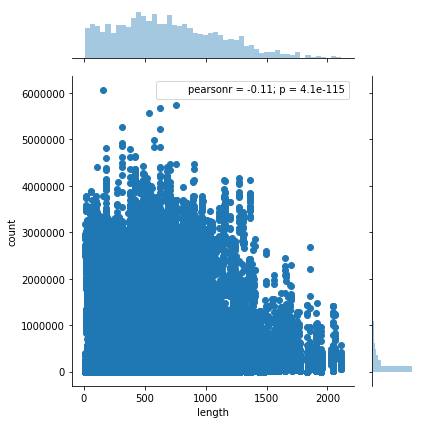

In [10]:
# visualization of length
sns.jointplot(x='length', y='count', data=data, kind='scatter', size=6)
plt.tight_layout()
plt.show()

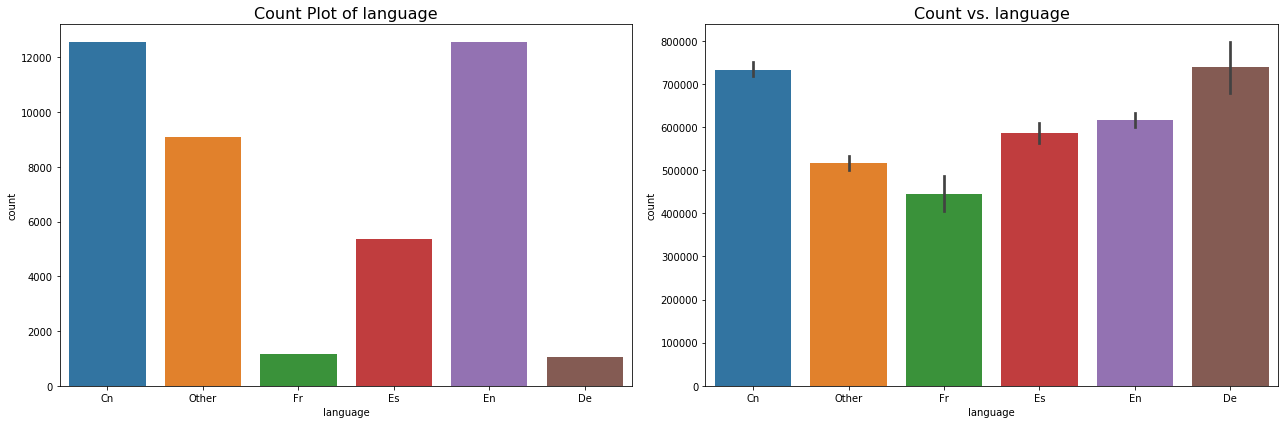

In [11]:
# visualization of language
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='language', data=data, ax=ax[0])
ax[0].set_title('Count Plot of language', fontsize=16)

sns.barplot(x='language', y='count', data=data, ax=ax[1])
ax[1].set_title('Count vs. language', fontsize=16)
plt.tight_layout()
plt.show()

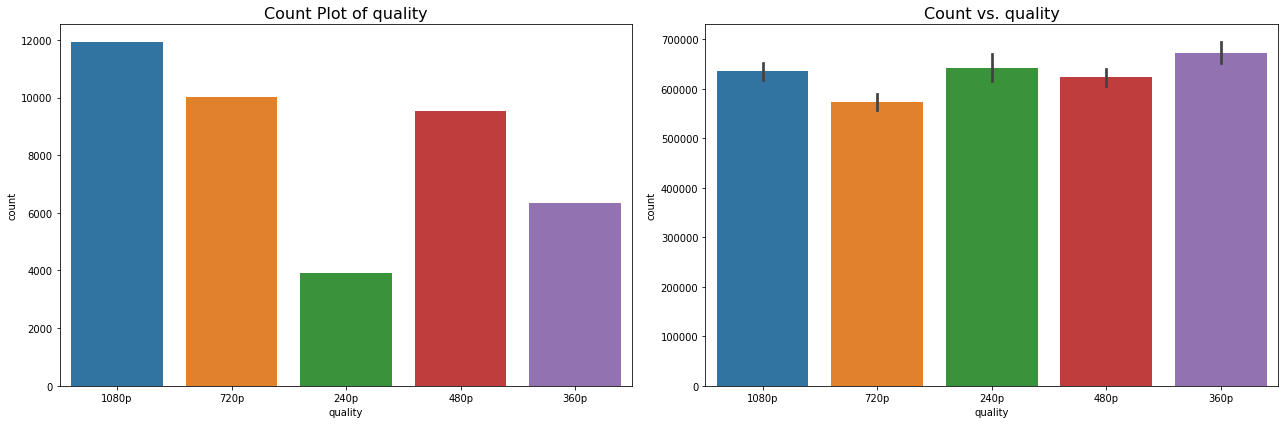

In [12]:
# visualization of quality
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='quality', data=data, ax=ax[0])
ax[0].set_title('Count Plot of quality', fontsize=16)

sns.barplot(x='quality', y='count', data=data, ax=ax[1])
ax[1].set_title('Count vs. quality', fontsize=16)
plt.tight_layout()
plt.show()

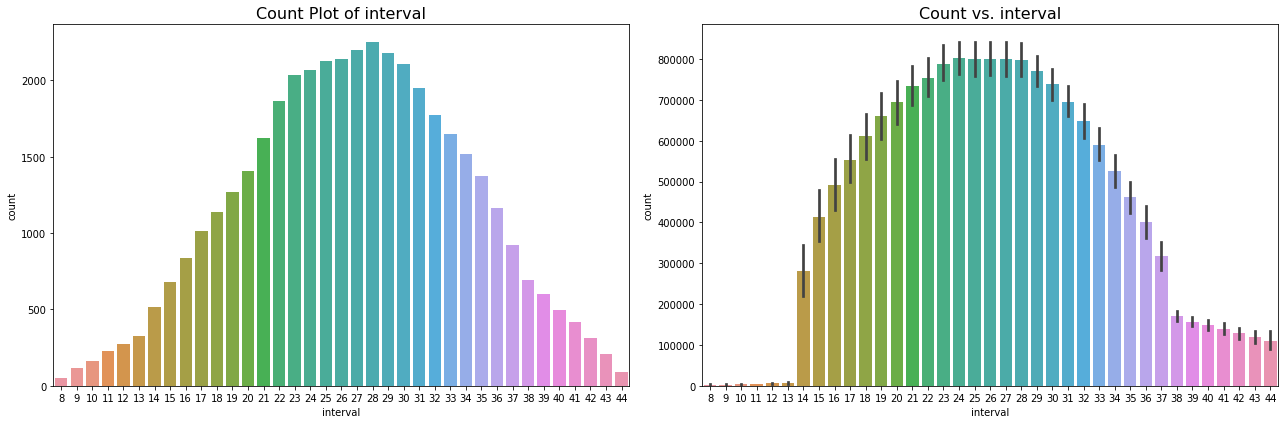

In [13]:
# visualization of interval
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='interval', data=data, ax=ax[0])
ax[0].set_title('Count Plot of interval', fontsize=16)

sns.barplot(x='interval', y='count', data=data, ax=ax[1])
ax[1].set_title('Count vs. interval', fontsize=16)
plt.tight_layout()
plt.show()

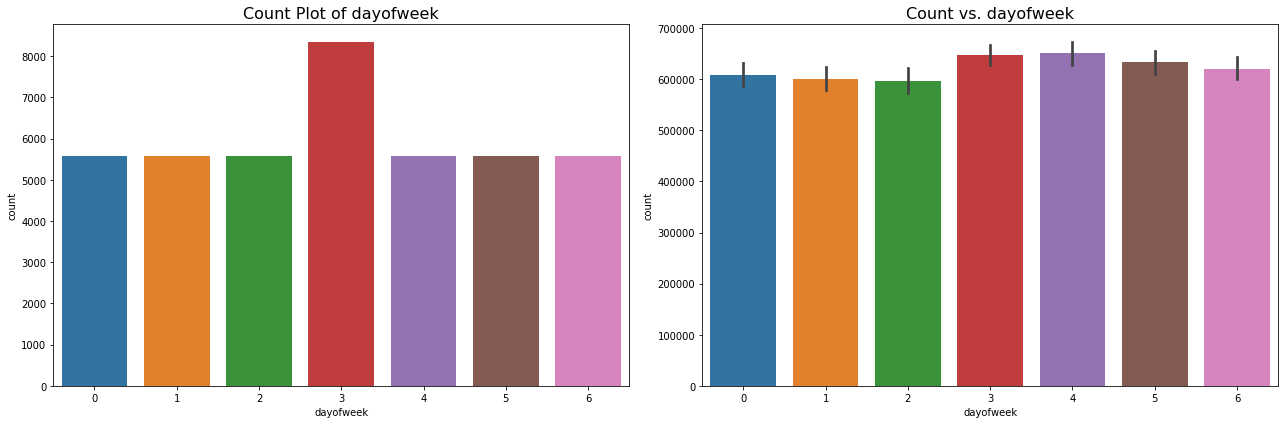

In [14]:
# visualization of dayofweek
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='dayofweek', data=data, ax=ax[0])
ax[0].set_title('Count Plot of dayofweek', fontsize=16)

sns.barplot(x='dayofweek', y='count', data=data, ax=ax[1])
ax[1].set_title('Count vs. dayofweek', fontsize=16)
plt.tight_layout()
plt.show()

# Questions

In [15]:
data.head()

,video_id,count,date,length,language,upload_date,quality,interval,dayofweek
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p,28,2
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p,36,0
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p,22,5
3,1472,234,2015-01-04,157,Other,2014-12-10,240p,25,6
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p,20,3


### Question 1

In [16]:
def parse_data(df):
    """ function to calculate the statistics for """
    counts = df.sort_values(by='date')['count'].values
    change = (counts[1:] - counts[:-1]) / counts[:-1]
    
    index = ['ct_mean', 'ct_std', 'ct_min', 'ct_25%', 'ct_50%', 'ct_75%', 'ct_max', 
             'cg_mean', 'cg_std', 'cg_min', 'cg_25%', 'cg_50%', 'cg_75%', 'cg_max']
    
    ct_vals = pd.Series(counts).describe()
    cg_vals = pd.Series(change).describe()
    
    ct_values = [ct_vals['mean'], ct_vals['std'], ct_vals['min'], ct_vals['25%'], 
                 ct_vals['50%'], ct_vals['75%'], ct_vals['max']]
    cg_values = [cg_vals['mean'], cg_vals['std'], cg_vals['min'], cg_vals['25%'], 
                 cg_vals['50%'], cg_vals['75%'], cg_vals['max']]
    
    return pd.Series(ct_values + cg_values, index=index)

data_stats = data.groupby('video_id').apply(parse_data)
data_stats.head()

,ct_mean,ct_std,ct_min,ct_25%,ct_50%,ct_75%,ct_max,cg_mean,cg_std,cg_min,cg_25%,cg_50%,cg_75%,cg_max
video_id,,,,,,,,,,,,,,
1,7.063560e+04,39200.460092,19382.0,41099.0,65907.0,96335.0,140460.0,-0.127437,0.092392,-0.271522,-0.186381,-0.151384,-0.067977,0.030277
2,1.737141e+06,114254.355156,1550493.0,1673415.5,1718352.0,1782226.5,2011096.0,-0.014184,0.061794,-0.084904,-0.061459,-0.043876,0.030687,0.095038
3,2.292781e+06,218636.897779,2016210.0,2132336.5,2247587.0,2436222.5,2653063.0,0.008923,0.054069,-0.075863,-0.028293,-0.001068,0.056393,0.097053
4,2.740392e+06,169611.440727,2474228.0,2611162.0,2719547.0,2880268.5,2984146.0,0.011310,0.050495,-0.063991,-0.027125,0.001606,0.050860,0.090804
5,4.479973e+05,237137.305768,169730.0,255574.5,388594.0,609508.0,983058.0,-0.111811,0.107193,-0.269337,-0.177432,-0.133447,-0.012729,0.031766


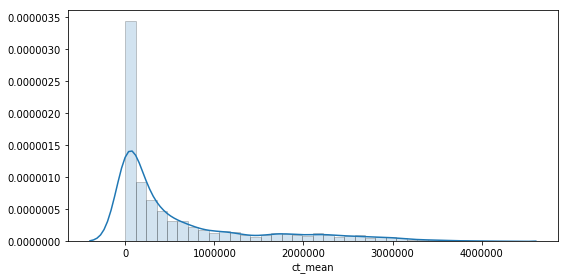

In [17]:
# Popularity
fig, ax = plt.subplots(figsize=(8, 4))
sns.distplot(data_stats['ct_mean'], ax=ax, hist_kws=hist_kws)
plt.tight_layout()
plt.show()

1. For `Stable and Popular` videos, based on above figure, we can manually set some threshold, for example, set `ct_mean` cutoff threshold to be $1,500,000$, we can define the popular `Stable and Popular` videos

In [18]:
popular_video = data_stats[data_stats['ct_mean'] > 1500000]
popular_video.head()

,ct_mean,ct_std,ct_min,ct_25%,ct_50%,ct_75%,ct_max,cg_mean,cg_std,cg_min,cg_25%,cg_50%,cg_75%,cg_max
video_id,,,,,,,,,,,,,,
2,1.737141e+06,114254.355156,1550493.0,1673415.5,1718352.0,1782226.5,2011096.0,-0.014184,0.061794,-0.084904,-0.061459,-0.043876,0.030687,0.095038
3,2.292781e+06,218636.897779,2016210.0,2132336.5,2247587.0,2436222.5,2653063.0,0.008923,0.054069,-0.075863,-0.028293,-0.001068,0.056393,0.097053
4,2.740392e+06,169611.440727,2474228.0,2611162.0,2719547.0,2880268.5,2984146.0,0.011310,0.050495,-0.063991,-0.027125,0.001606,0.050860,0.090804
8,2.049360e+06,157190.210173,1776574.0,1950028.5,2042499.0,2154066.5,2328022.0,0.004013,0.055904,-0.090772,-0.034195,0.009304,0.046501,0.081409
14,1.593414e+06,249941.247042,1301816.0,1380598.0,1502636.0,1793568.0,2056101.0,-0.011086,0.063787,-0.095199,-0.074206,-0.005127,0.049045,0.092254


2. For `Hot` videos, we can use the video's daily change rate.

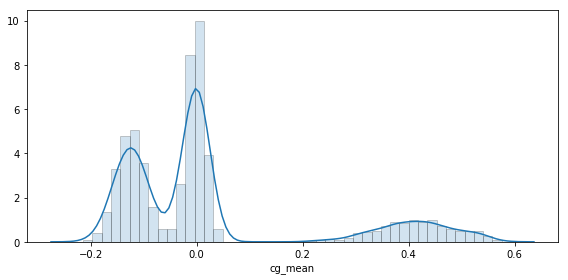

In [19]:
# Popularity
fig, ax = plt.subplots(figsize=(8, 4))
sns.distplot(data_stats['cg_mean'], ax=ax, hist_kws=hist_kws)
plt.tight_layout()
plt.show()

From above figure, it's clear that if we set the cutoff threshold for change rate, we can separate a group of videos that the mean daily change rate is above $20\%$, which can be defined a `Hot` videos.

In [20]:
hot_video = data_stats[data_stats['cg_mean'] > 0.2]
hot_video.head()

,ct_mean,ct_std,ct_min,ct_25%,ct_50%,ct_75%,ct_max,cg_mean,cg_std,cg_min,cg_25%,cg_50%,cg_75%,cg_max
video_id,,,,,,,,,,,,,,
10,8903.133333,10248.629782,591.0,1882.5,5483.0,11318.5,34789.0,0.353819,0.220112,0.006865,0.238332,0.324975,0.416434,0.780195
13,91228.200000,91574.506421,4746.0,16688.0,45930.0,153985.5,264570.0,0.350798,0.223287,-0.000643,0.171082,0.373361,0.514471,0.629066
15,6184.400000,9384.882059,494.0,1190.0,1705.0,6231.5,33208.0,0.381382,0.313682,-0.048170,0.026856,0.471749,0.656678,0.740953
28,105011.600000,132346.803029,6152.0,14399.0,30084.0,152599.5,405278.0,0.367767,0.239208,-0.045739,0.206640,0.300966,0.502638,0.778389
29,78372.866667,70559.053747,9118.0,16789.5,45226.0,131717.0,212419.0,0.271285,0.228626,-0.028478,0.046231,0.293353,0.455947,0.665369


3. For `Everything else`, the rest videos are selected.

### Question 2

In [21]:
data['hot'] = False
data.loc[data['video_id'].isin(hot_video.index), 'hot'] = True
data.head()

,video_id,count,date,length,language,upload_date,quality,interval,dayofweek,hot
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p,28,2,False
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p,36,0,False
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p,22,5,False
3,1472,234,2015-01-04,157,Other,2014-12-10,240p,25,6,False
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p,20,3,True


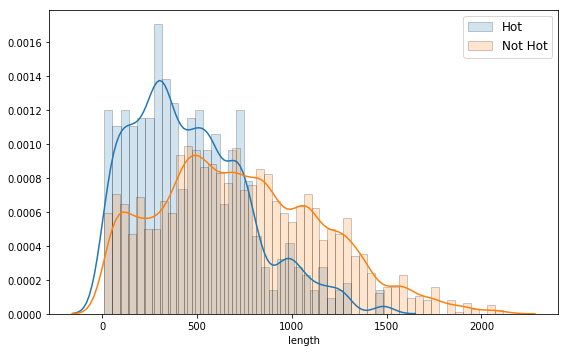

In [22]:
# visualization of length
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(data[data['hot']==True]['length'], label='Hot', ax=ax, hist_kws=hist_kws)
sns.distplot(data[data['hot']==False]['length'], label='Not Hot', ax=ax, hist_kws=hist_kws)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

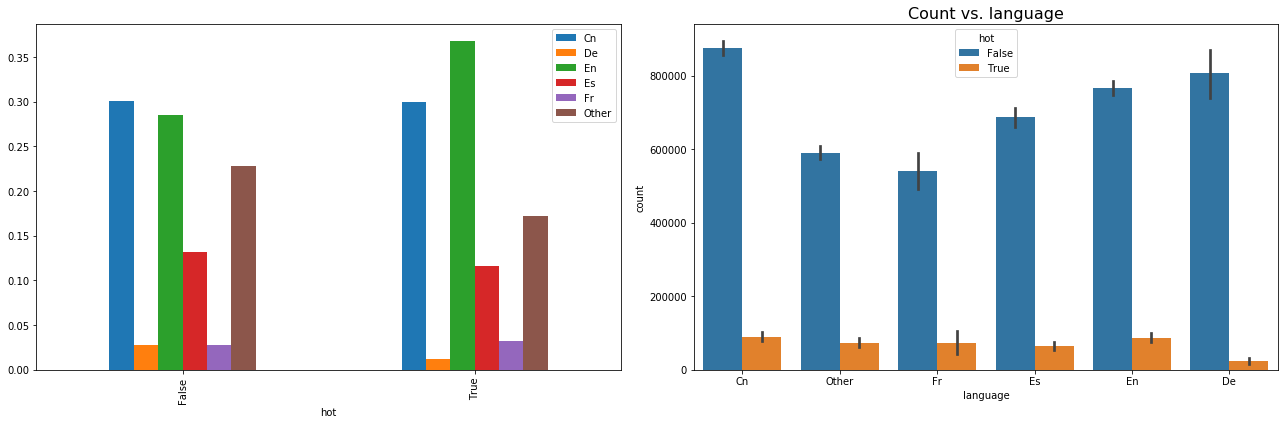

In [23]:
# visualization of language
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
tmp = data.groupby('hot')['language'].apply(lambda x: x.value_counts(normalize=True)).unstack()
tmp.plot(kind='bar', ax=ax[0])

sns.barplot(x='language', y='count', data=data, hue='hot', ax=ax[1])
ax[1].set_title('Count vs. language', fontsize=16)
plt.tight_layout()
plt.show()

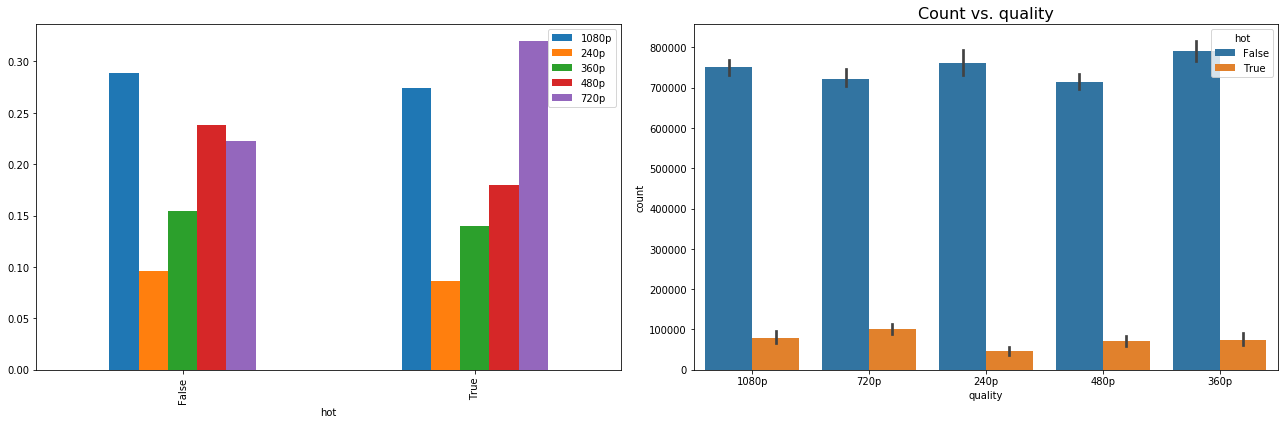

In [24]:
# visualization of quality
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
tmp = data.groupby('hot')['quality'].apply(lambda x: x.value_counts(normalize=True)).unstack()
tmp.plot(kind='bar', ax=ax[0])

sns.barplot(x='quality', y='count', hue='hot', data=data, ax=ax[1])
ax[1].set_title('Count vs. quality', fontsize=16)
plt.tight_layout()
plt.show()

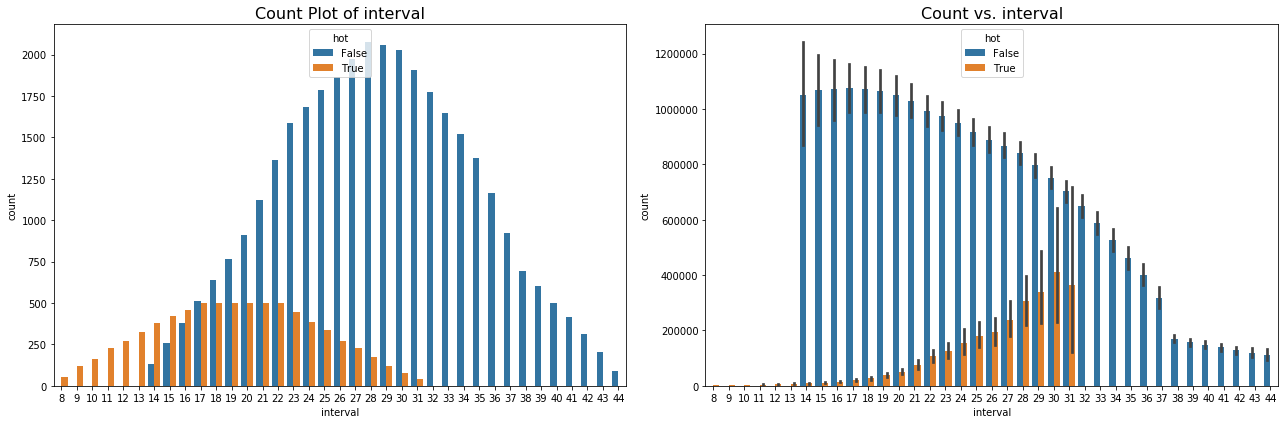

In [25]:
# visualization of interval
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='interval', hue='hot', data=data, ax=ax[0])
ax[0].set_title('Count Plot of interval', fontsize=16)

sns.barplot(x='interval', y='count', hue='hot', data=data, ax=ax[1])
ax[1].set_title('Count vs. interval', fontsize=16)
plt.tight_layout()
plt.show()

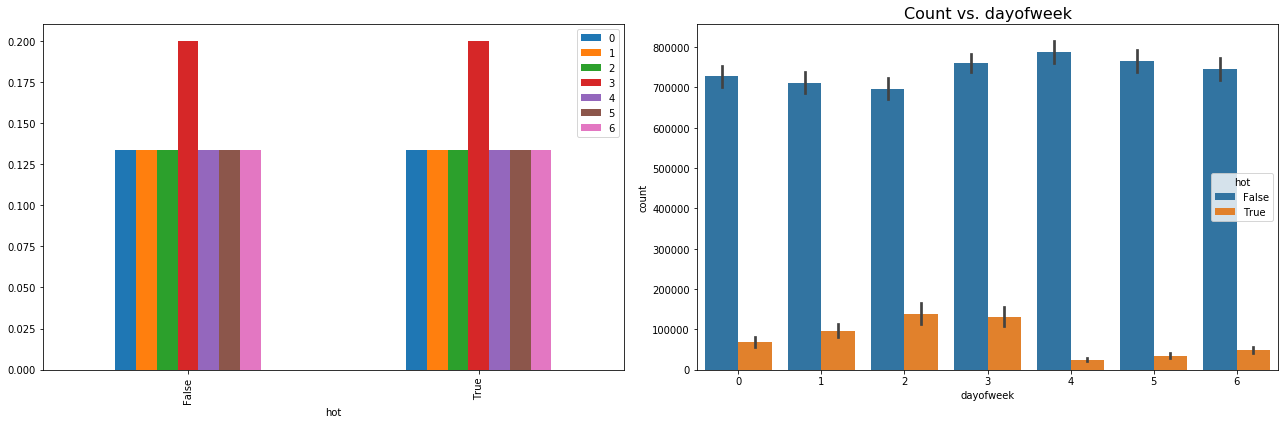

In [26]:
# visualization of dayofweek
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
tmp = data.groupby('hot')['dayofweek'].apply(lambda x: x.value_counts(normalize=True)).unstack()
tmp.plot(kind='bar', ax=ax[0])

sns.barplot(x='dayofweek', y='count', hue='hot', data=data, ax=ax[1])
ax[1].set_title('Count vs. dayofweek', fontsize=16)
plt.tight_layout()
plt.show()

### Question 3

[Reference](https://github.com/stasi009/TakeHomeDataChallenges/blob/master/18.OnlineVideo/online_videos.ipynb)

* we can build a model to predict whether the video will be Hot (trending up) or not. The videos which are predicted to be Hot will be shown on the Home page and attract users to click.
* study the reason why videos uploaded on Sunday/Monday are much more likely to be Hot than videos uploaded on Thursday.
    - if the reason is like my guess, is because Sunday/Monday allow the video have longer "offline propagation time"
    - then the problem is why "online propagation" doesn't work well?
    - Is it because our website doesn't have a "Share..." buttion?
    - or is it because we didn't include the most popular social network in our "Share with" list?
* study the reason why English videos are more likely to be Hot.
    - is is because the translation issue?
    - or maybe we didn't include local social network (such as weibo in China) in our 'Share with' list.